Import and split the data into training and testing sets

In [2]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM, Dense
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
url='https://raw.githubusercontent.com/ctkrall/stat6289/main/finaldata.csv'
df = pd.read_csv(url)

print(df.columns)
#time series the date by the first column of date
df['Mea_Date'] = pd.to_datetime(df['Mea_Date'])
df.set_axis(df['Mea_Date'], inplace=True)

print(len(df))
print(df.head())

Index(['Mea_Date', 'SBP'], dtype='object')
676
             Mea_Date  SBP
Mea_Date                  
2016-11-01 2016-11-01  137
2016-11-02 2016-11-02  139
2016-11-04 2016-11-04  121
2016-11-08 2016-11-08  119
2016-11-09 2016-11-09  117


In [ ]:
#set the train set and the validation set
SBP_data = df['SBP'].values
SBP_data = SBP_data.reshape((-1,1))
#we use the 2/3 length as the training set
#rest of dateset as the validation set
split_percent = 0.75
split = int(split_percent*len(SBP_data))

SBP_trainset = SBP_data[:split]
SBP_validset = SBP_data[split:]

date_trainset = df['Mea_Date'][:split]
date_validset = df['Mea_Date'][split:]


print(len(SBP_trainset))
print(len(SBP_validset))

507
169


In [ ]:
look_back = 50

train_generator = TimeseriesGenerator(SBP_trainset, SBP_trainset, length=look_back, batch_size=20)

In [ ]:
test_generator = TimeseriesGenerator(SBP_validset, SBP_validset, length=look_back, batch_size=1)

Define a multilayer RNN

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape = (507, 1)))
model.add(keras.layers.SimpleRNN(100, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.MeanSquaredError()])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________
None


train the model

In [ ]:
num_epochs = 30
history = model.fit(train_generator, epochs=num_epochs, validation_data = test_generator, verbose=1)


Epoch 1/30
23/23 [==============================] - 1s 31ms/step - loss: 3165.0703 - val_loss: 387.3386
Epoch 2/30
23/23 [==============================] - 0s 21ms/step - loss: 240.1901 - val_loss: 192.0197
Epoch 3/30
23/23 [==============================] - 0s 22ms/step - loss: 179.8754 - val_loss: 168.4360
Epoch 4/30
23/23 [==============================] - 0s 21ms/step - loss: 174.4143 - val_loss: 160.8901
Epoch 5/30
23/23 [==============================] - 0s 21ms/step - loss: 169.9183 - val_loss: 159.7212
Epoch 6/30
23/23 [==============================] - 0s 20ms/step - loss: 168.6768 - val_loss: 158.6275
Epoch 7/30
23/23 [==============================] - 1s 23ms/step - loss: 167.8102 - val_loss: 157.6854
Epoch 8/30
23/23 [==============================] - 1s 22ms/step - loss: 166.7655 - val_loss: 157.5122
Epoch 9/30
23/23 [==============================] - 0s 21ms/step - loss: 166.2708 - val_loss: 156.4926
Epoch 10/30
23/23 [==============================] - 1s 22ms/step - loss

In [ ]:
#model2 with added layer
model2 = keras.Sequential()
model2.add(keras.layers.SimpleRNN(
        input_shape = (look_back, 1), return_sequences = True, activation = 'relu',
        units = 100))
model2.add(keras.layers.SimpleRNN(
        input_shape = (look_back, 1), activation = 'relu',
        units = 100))
model2.add(Dense(
        units = 1,
        activation = 'relu'))

model2.compile(loss = 'mse', optimizer = 'adam', metrics=[keras.metrics.MeanSquaredError()])

history2 = model2.fit(train_generator, epochs=num_epochs, validation_data=test_generator,verbose=1)

Epoch 1/30
23/23 [==============================] - 3s 50ms/step - loss: 867.5688 - val_loss: 155.0079
Epoch 2/30
23/23 [==============================] - 1s 39ms/step - loss: 175.0830 - val_loss: 154.6775
Epoch 3/30
23/23 [==============================] - 1s 37ms/step - loss: 163.0023 - val_loss: 158.6660
Epoch 4/30
23/23 [==============================] - 1s 38ms/step - loss: 162.5920 - val_loss: 154.1673
Epoch 5/30
23/23 [==============================] - 1s 40ms/step - loss: 165.9654 - val_loss: 202.4788
Epoch 6/30
23/23 [==============================] - 1s 40ms/step - loss: 194.9017 - val_loss: 158.2660
Epoch 7/30
23/23 [==============================] - 1s 38ms/step - loss: 167.4931 - val_loss: 156.1584
Epoch 8/30
23/23 [==============================] - 1s 37ms/step - loss: 164.4059 - val_loss: 151.2498
Epoch 9/30
23/23 [==============================] - 1s 39ms/step - loss: 165.3101 - val_loss: 159.4403
Epoch 10/30
23/23 [==============================] - 1s 39ms/step - loss:

In [ ]:
#model3 with two added layers
model3 = keras.Sequential()
model3.add(keras.layers.SimpleRNN(
        input_shape = (look_back, 1), return_sequences = True, activation = 'relu',
        units = 100))
model3.add(keras.layers.SimpleRNN(
        input_shape = (look_back, 1), return_sequences = True, activation = 'relu',
        units = 100))
model3.add(keras.layers.SimpleRNN(
        input_shape = (look_back, 1), activation = 'relu',
        units = 100))
model3.add(Dense(
        units = 1,
        activation = 'relu'))

model3.compile(loss = 'mse', optimizer = 'adam', metrics=[keras.metrics.MeanSquaredError(), keras.metrics.RootMeanSquaredError()])
history3 = model3.fit(train_generator, epochs=num_epochs, validation_data=test_generator,verbose=1)

Epoch 1/30
23/23 [==============================] - 3s 68ms/step - loss: 1572.3114 - val_loss: 224.3973
Epoch 2/30
23/23 [==============================] - 1s 55ms/step - loss: 177.2910 - val_loss: 151.8821
Epoch 3/30
23/23 [==============================] - 1s 53ms/step - loss: 162.9300 - val_loss: 165.2227
Epoch 4/30
23/23 [==============================] - 1s 54ms/step - loss: 179.6818 - val_loss: 148.8820
Epoch 5/30
23/23 [==============================] - 1s 54ms/step - loss: 165.5552 - val_loss: 161.4560
Epoch 6/30
23/23 [==============================] - 1s 54ms/step - loss: 170.7484 - val_loss: 151.7294
Epoch 7/30
23/23 [==============================] - 1s 54ms/step - loss: 174.2212 - val_loss: 149.9335
Epoch 8/30
23/23 [==============================] - 1s 54ms/step - loss: 158.6931 - val_loss: 147.9112
Epoch 9/30
23/23 [==============================] - 1s 54ms/step - loss: 157.7069 - val_loss: 144.5227
Epoch 10/30
23/23 [==============================] - 1s 53ms/step - loss

Graph loss vs epoch for all models

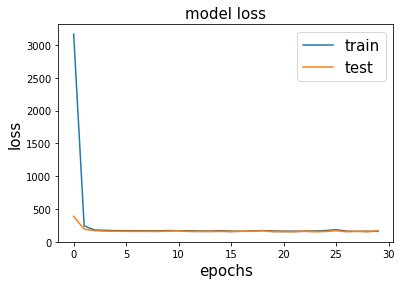

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#pyplot.legend()

plt.title('model loss',size=15)
plt.ylabel('loss',size=15)
plt.xlabel('epochs',size=15)
plt.legend(loc='upper right',fontsize=15)

plt.show()

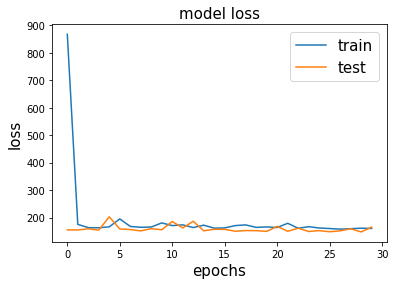

In [ ]:
# plot history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
#pyplot.legend()

plt.title('model loss',size=15)
plt.ylabel('loss',size=15)
plt.xlabel('epochs',size=15)
plt.legend(loc='upper right',fontsize=15)

plt.show()

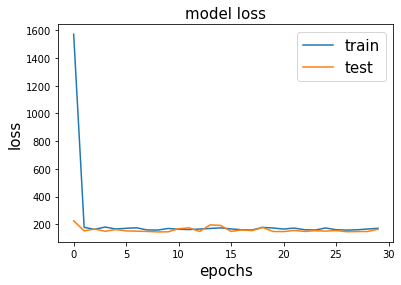

In [ ]:
# plot history
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
#pyplot.legend()

plt.title('model loss',size=15)
plt.ylabel('loss',size=15)
plt.xlabel('epochs',size=15)
plt.legend(loc='upper right',fontsize=15)

plt.show()

predicting future values

In [ ]:
SBP_prediction = model.predict(test_generator)
SBP_prediction2 = model2.predict(test_generator)
SBP_prediction3 = model3.predict(test_generator)


SBP_trainset = SBP_trainset.reshape((-1))
SBP_validset = SBP_validset.reshape((-1))
SBP_prediction = SBP_prediction.reshape((-1))
SBP_prediction2 = SBP_prediction2.reshape((-1))
SBP_prediction3 = SBP_prediction3.reshape((-1))

get mse, rmse, mae

Visualize the result

In [ ]:

trace1 = go.Scatter(
    x = date_trainset,
    y = SBP_trainset,
    mode = 'lines',
    name = 'Data'
)

trace2 = go.Scatter(
    x = date_validset,
    y = SBP_prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_validset,
    y = SBP_validset,
    mode='lines',
    name = 'Ground Truth'
)
trace4 = go.Scatter(
    x = date_validset,
    y = SBP_prediction2,
    mode = 'lines',
    name = 'Prediction_2'
)
trace5 = go.Scatter(
    x = date_validset,
    y = SBP_prediction3,
    mode = 'lines',
    name = 'Prediction_3'
)
layout = go.Layout(
    title = "SBP forecating",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "SBP(mmHg)"}
)
fig = go.Figure(data=[trace1, trace2, trace3,trace4,trace5], layout=layout, layout_xaxis_range=['2018-07-01','2019-10-23'])
fig.show()